In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime

# Feature Engineering
features:
FG per game by shot

In [113]:
df = pd.read_csv('../data/data1.csv')


In [114]:
df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,period,playoffs,...,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id,time_remaining
0,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,1,0,...,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,away,POR,2,622
1,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,1,0,...,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,away,POR,3,465
2,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,1,0,...,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,away,POR,4,412
3,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,2,0,...,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,away,POR,5,379
4,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,3,0,...,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,away,POR,6,572


In [115]:
# shot id is needed. we can delete it later
def new_features(df):
    df['current_fg'] = ""
    df['current_streak'] = ""
    df['streak_before_shot'] = ""
    df['current_points'] = ""
    for game in df.game_id.sort_values().unique():
        previous = [0,0]
        streak = 0
        shots = df[df['game_id'] == game]['shot_id'].sort_values()
        prev_streak = 0
        points = 0
        for shot in shots:
            # print(df[(df['game_id'] == game) & (df['shot_id'] == shot)]['shot_made_flag'])
            flag = df[(df['game_id'] == game) & (df['shot_id'] == shot)]['shot_made_flag'].item()
            shot_type = df[(df['game_id'] == game) & (df['shot_id'] == shot)]['shot_type'].item()
            period = df[(df['game_id'] == game) & (df['shot_id'] == shot)]['period'].item()
            # TODO divide per period somehow and multiply by the time remaining
            previous[1] += 1
            if flag == 1.0:
                previous[0] += 1
                prev_streak = streak
                streak += 1

                if shot_type == '2PT Field Goal':
                    points += 2
                else:
                    points += 3
            else:
                prev_streak = streak
                streak = 0

            df.loc[(df['game_id']==game) & (df['shot_id'] == shot), ['current_fg'] ] = round(previous[0]/previous[1],2)
            df.loc[(df['game_id']==game) & (df['shot_id'] == shot), ['current_streak'] ] = streak
            df.loc[(df['game_id']==game) & (df['shot_id'] == shot), ['streak_before_shot'] ] = prev_streak
            df.loc[(df['game_id']==game) & (df['shot_id'] == shot), ['current_points'] ] = points


    return df

In [116]:
df=new_features(df)

In [117]:
# df.loc[(df['game_id']==20000012) & (df['shot_id'] == 2), ['shot_made_flag'] ]
df

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,period,playoffs,...,team_name,game_date,matchup,opponent,shot_id,time_remaining,current_fg,current_streak,streak_before_shot,current_points
0,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,1,0,...,Los Angeles Lakers,2000-10-31,away,POR,2,622,0.0,0,0,0
1,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,1,0,...,Los Angeles Lakers,2000-10-31,away,POR,3,465,0.5,1,0,2
2,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,1,0,...,Los Angeles Lakers,2000-10-31,away,POR,4,412,0.33,0,1,2
3,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,2,0,...,Los Angeles Lakers,2000-10-31,away,POR,5,379,0.5,1,0,4
4,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,3,0,...,Los Angeles Lakers,2000-10-31,away,POR,6,572,0.4,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25692,Driving Layup Shot,Layup,382,49900088,34.0443,0,0,-118.2698,4,1,...,Los Angeles Lakers,2000-06-19,home,IND,30692,424,0.26,0,0,12
25693,Jump Shot,Jump Shot,397,49900088,33.9963,1,48,-118.2688,4,1,...,Los Angeles Lakers,2000-06-19,home,IND,30693,365,0.25,0,0,12
25694,Running Jump Shot,Jump Shot,426,49900088,33.8783,-134,166,-118.4038,4,1,...,Los Angeles Lakers,2000-06-19,home,IND,30695,208,0.29,1,0,14
25695,Jump Shot,Jump Shot,448,49900088,33.7773,31,267,-118.2388,4,1,...,Los Angeles Lakers,2000-06-19,home,IND,30696,130,0.27,0,1,14


Extracting the month, players shoot differently depending on the month

In [8]:
def extract_month(df):
    """
    Extract the month from the datetime format.
    :param df: dataframe
    :return: modified df with the month feature
    """
    df['month'] = df.game_date.apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").month)
    return df


In [9]:
# get points scored per game
# shot_type = '2PT Field Goal'
# shot_made_flag 1.0 0.0
# df[df.game_id == 20000012].apply(lambda x: x['shot_type'], axis=1)

def feature_engineering(df):
    """
    Do the feature engineering on the dataframe
    :param df: original dataset
    :return: copy of the original but with modificaiton.
    """
    df_new = df.copy(deep=True)
    df_new = new_features(df_new)
    df_new = extract_month(df_new)
    return df_new

In [10]:
df = feature_engineering(df)

In [11]:
df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,period,playoffs,...,game_date,matchup,opponent,shot_id,time_remaining,points,season_avg,plus_minus,FGP,month
0,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,1,0,...,2000-10-31,away,POR,2,622,8,18.26,-10.26,0.444,10
1,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,1,0,...,2000-10-31,away,POR,3,465,8,18.26,-10.26,0.444,10
2,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,1,0,...,2000-10-31,away,POR,4,412,8,18.26,-10.26,0.444,10
3,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,2,0,...,2000-10-31,away,POR,5,379,8,18.26,-10.26,0.444,10
4,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,3,0,...,2000-10-31,away,POR,6,572,8,18.26,-10.26,0.444,10


<AxesSubplot:xlabel='season', ylabel='FGP'>

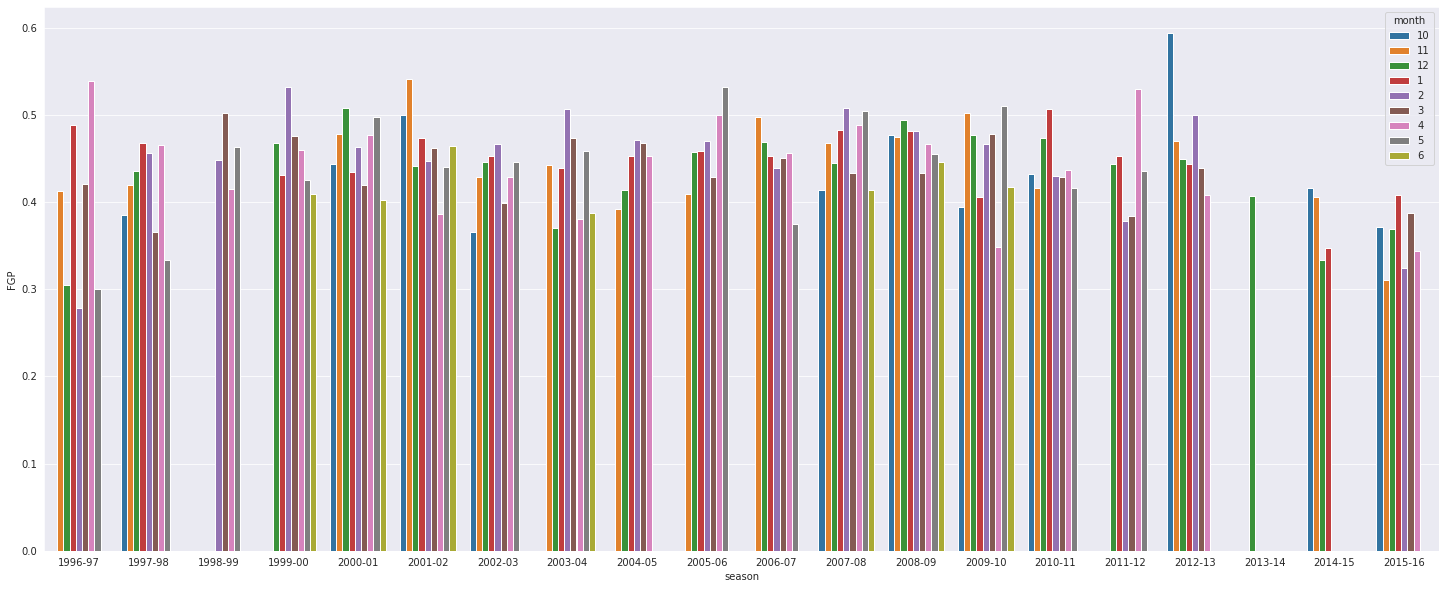

In [12]:
plt.figure(figsize=(25,10))
df_fgp = df.groupby(['season', 'month'])['FGP'].mean().reset_index(name='FGP')
sns.barplot(data=df_fgp, x='season', y='FGP', hue='month',ci=None, hue_order=[10,11,12,1,2,3,4,5,6])

FGP per game in a season

/home/filip/lib/python3.8/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/filip/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


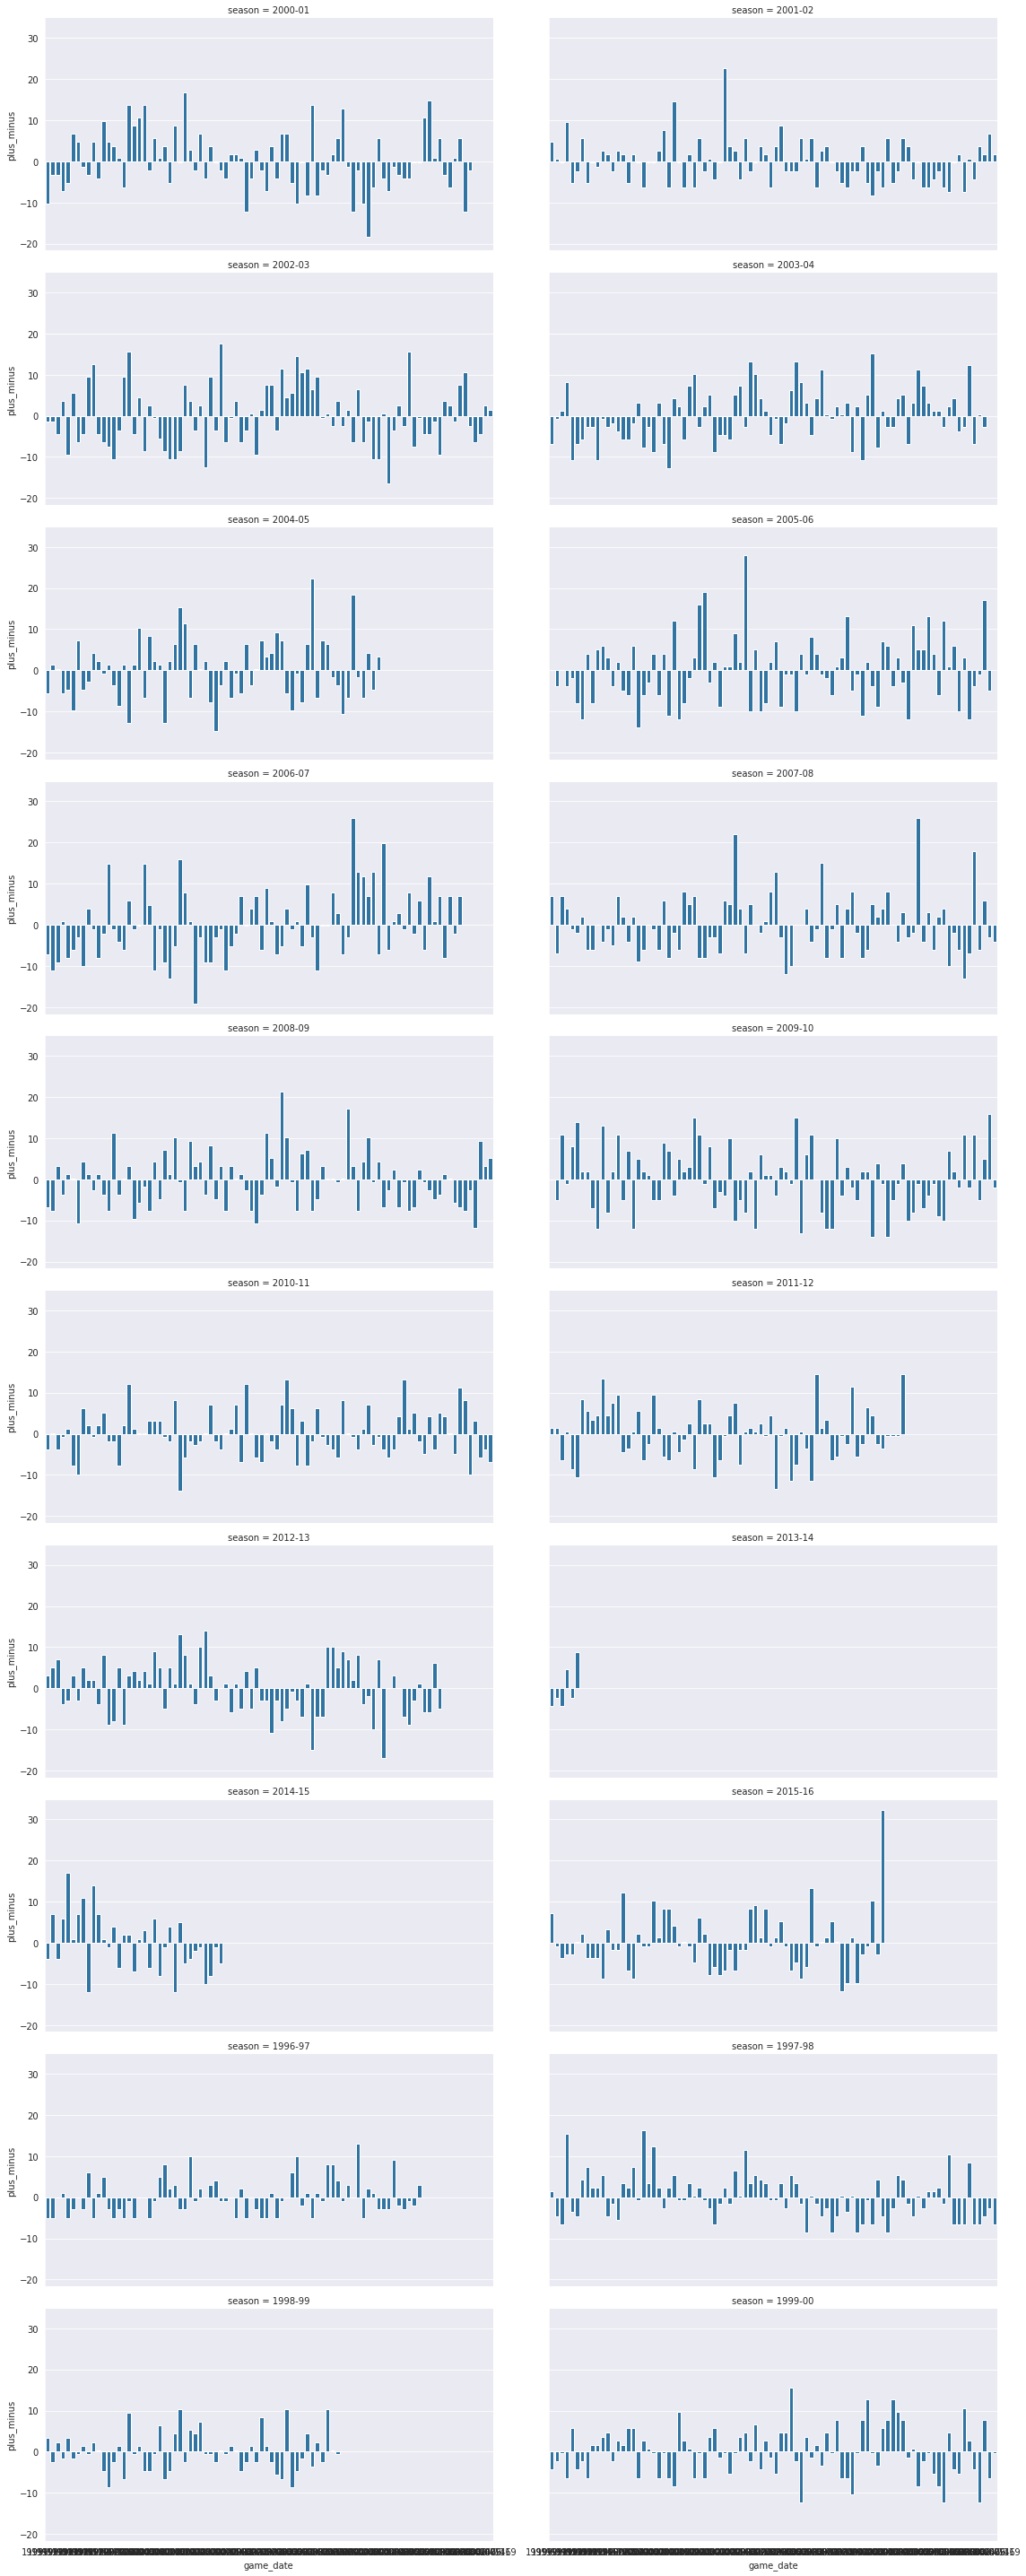

In [13]:
df_pm = df[['season', 'plus_minus', 'game_date']].drop_duplicates()
g = sns.FacetGrid(df_pm, col="season", col_wrap=2, size=4, aspect=2)
g.map(sns.barplot,'game_date', 'plus_minus', data=df_pm)

In [14]:
df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,period,playoffs,...,game_date,matchup,opponent,shot_id,time_remaining,points,season_avg,plus_minus,FGP,month
0,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,1,0,...,2000-10-31,away,POR,2,622,8,18.26,-10.26,0.444,10
1,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,1,0,...,2000-10-31,away,POR,3,465,8,18.26,-10.26,0.444,10
2,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,1,0,...,2000-10-31,away,POR,4,412,8,18.26,-10.26,0.444,10
3,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,2,0,...,2000-10-31,away,POR,5,379,8,18.26,-10.26,0.444,10
4,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,3,0,...,2000-10-31,away,POR,6,572,8,18.26,-10.26,0.444,10


In [16]:
df.to_csv('../data/data2.csv', index=False)